In [19]:
import numpy as np
delta = 1/(24*252)
mu_s = 0.0
mu_m = 0.0
b_I = 0.5
b_M = 0.5
k_I = 2.0
k_M = 2.0
beta = 1.0
sigma_bar_I = 0.25
sigma_bar_M = 0.15

T = 3/12
N = 21*24*3
dt = T/N 

In [43]:
np.random.seed(1)
dw1t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)
dw2t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)
dw3t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)
dw4t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)

rs = np.zeros((200, 21*24*3))
rm = np.zeros((200, 21*24*3))
sigmai = np.zeros((200, 21*24*3))
sigmam = np.zeros((200, 21*24*3))

for i in range (200):
    sigma_I = 0.25
    sigma_M = 0.15
    for j in range (21*24*3):
        rts = mu_s*dt + sigma_I * dw1t[i][j] + beta * sigma_M * dw2t[i][j]
        rtm = mu_m*dt + sigma_M * dw2t[i][j]

        dsigma_I = k_I * (sigma_bar_I - sigma_I) * dt+b_I * sigma_I * dw3t[i][j]
        dsigma_M = k_M * (sigma_bar_M - sigma_M) * dt+b_M * sigma_M * dw4t[i][j]

        sigma_I = sigma_I + dsigma_I
        sigma_M = sigma_M + dsigma_M

        rs[i][j] = rts
        rm[i][j] = rtm
        sigmai[i][j] = sigma_I
        sigmam[i][j] = sigma_M



part1

In [53]:
sigma_tilde_M = sigma_bar_M
sigma_tilde_S = np.sqrt(sigma_bar_I ** 2 + (beta * sigma_bar_M)**2)

profit1 = np.sqrt(np.sum(np.square(rm),axis=1)/T) - sigma_tilde_M
profit2 = sigma_tilde_S - np.sqrt(np.sum(np.square(rs),axis=1)/T)

profit = profit1+profit2

print(profit1+profit2)

[-0.00210189  0.03447416 -0.00048047 -0.01321576 -0.01279081  0.00582758
 -0.00996927 -0.02239211  0.02798439 -0.02794365 -0.03131481  0.02754212
  0.00826087 -0.02559017 -0.05540235 -0.01121611 -0.00309769 -0.03188064
 -0.00613349 -0.02369752  0.02186169  0.02952366 -0.00128897 -0.02810166
  0.01011274 -0.01106727  0.04509434  0.01780467  0.04702792 -0.05095718
  0.03175194  0.01630885 -0.03149595  0.00466235  0.04708333  0.04471484
  0.02166564 -0.0188955  -0.00504412 -0.02904783 -0.01629917  0.00473465
  0.01735316 -0.01707717  0.00252925  0.01849391 -0.02748841 -0.02026213
 -0.04918492 -0.06058878  0.02227127  0.00321249 -0.02177726  0.0118413
 -0.04353052 -0.01845282  0.0197866   0.04452474 -0.02702047 -0.03790267
 -0.02057665 -0.00243026  0.0209138  -0.01403182 -0.01194947  0.01811777
  0.01056668 -0.01514325 -0.00590572  0.00943113  0.0073752   0.03020686
 -0.03061078  0.04802553 -0.04065698 -0.02476617 -0.04329147  0.00627155
 -0.00158963 -0.03506995  0.04256885 -0.04756922  0.

part2

In [51]:
sigma_s = np.sqrt(sigmai ** 2 + (beta * sigmam)**2)
rho_t = (beta * sigmam) / sigma_s
rho = np.mean(rho_t, axis=1)
print(rho)

[0.47199265 0.58044283 0.47205984 0.48915589 0.46526507 0.52912453
 0.50203405 0.48769379 0.58172433 0.49166282 0.43321868 0.57017383
 0.54256009 0.47533764 0.39746447 0.47531302 0.49737529 0.44609841
 0.46193738 0.49269477 0.56135042 0.56365248 0.46448981 0.48090278
 0.5350477  0.57072071 0.62544303 0.51485584 0.66220613 0.41094817
 0.58276773 0.53467783 0.45658773 0.54556922 0.6296176  0.62378953
 0.58718011 0.47254716 0.52229079 0.44368698 0.48979655 0.47363859
 0.57447026 0.47954685 0.52173801 0.53810653 0.49594646 0.50116403
 0.43109424 0.43689656 0.58704037 0.52831744 0.47326111 0.5636115
 0.42981479 0.48650625 0.53746971 0.60507004 0.42720242 0.43870306
 0.48555362 0.53568667 0.5060335  0.49977236 0.49772541 0.57118613
 0.50988291 0.49133118 0.52870167 0.52343672 0.58113017 0.57880092
 0.40125152 0.63300633 0.48022968 0.47953938 0.44277329 0.56656211
 0.54898142 0.49288209 0.60369808 0.45785288 0.51144069 0.60469436
 0.47055018 0.62404797 0.56060159 0.48865562 0.52311075 0.47897

part3

In [59]:
corr_matrix = np.zeros((200,))
for i in range (200):
    corr_matrix[i] = np.corrcoef(rs[i,: ], rm[i,:])[1,0]
print(corr_matrix / 200)

[0.00249975 0.00276868 0.00216464 0.00250824 0.00233155 0.00246999
 0.00270365 0.00242157 0.0029311  0.00261518 0.0022433  0.0026134
 0.00275581 0.00234446 0.00196237 0.00235302 0.00263475 0.0021516
 0.00230881 0.00257035 0.00280775 0.00275812 0.0026032  0.00250267
 0.00273778 0.00293614 0.00321059 0.0027113  0.00330067 0.00197887
 0.00295896 0.00250821 0.00228478 0.00259361 0.00305564 0.00319253
 0.002869   0.00224698 0.00266224 0.00231569 0.0023778  0.00244055
 0.00298842 0.0024914  0.00245168 0.0026215  0.00255871 0.00248354
 0.00233265 0.00218249 0.00297437 0.00250898 0.00230589 0.00306667
 0.0020917  0.00243143 0.00259752 0.00312587 0.0022068  0.00213745
 0.00240097 0.00243005 0.00254973 0.0025258  0.0026215  0.00270164
 0.00267817 0.00241317 0.00276966 0.00259892 0.00298345 0.00294071
 0.00186478 0.00300543 0.0024424  0.00232435 0.00238777 0.0026972
 0.00277483 0.00238577 0.00297588 0.00231808 0.00255628 0.00302208
 0.00240897 0.00319101 0.00275085 0.00245062 0.00246444 0.0022876

part4

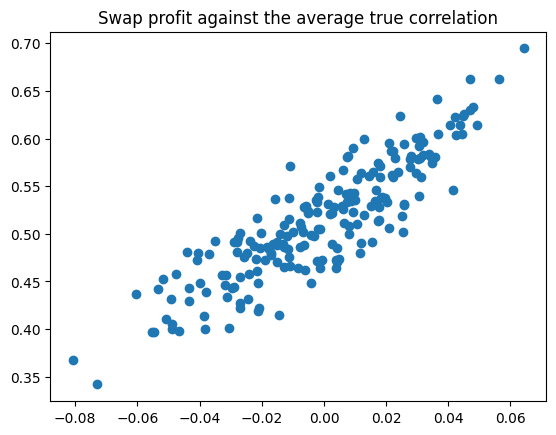

In [55]:
import matplotlib.pyplot as plt
x = profit
y = rho
plt.title('Swap profit against the average true correlation')
plt.scatter(x, y)
plt.show()

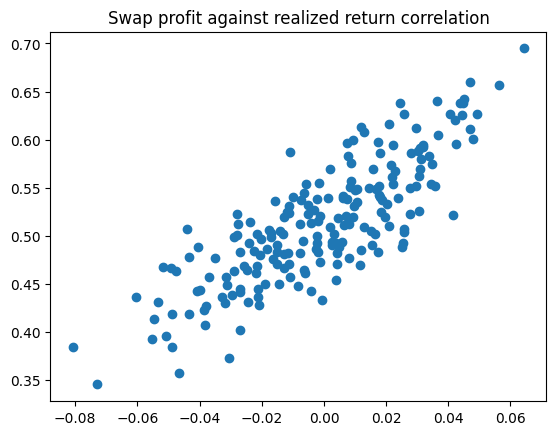

In [60]:
x = profit
y = corr_matrix
plt.title('Swap profit against realized return correlation')
plt.scatter(x, y)
plt.show()

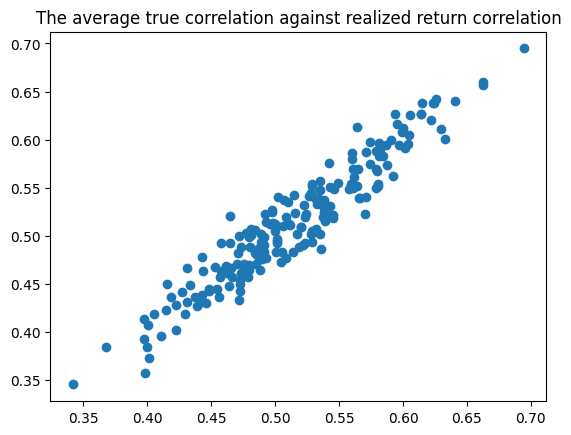

In [61]:
x = rho
y = corr_matrix
plt.title('The average true correlation against realized return correlation')
plt.scatter(x, y)
plt.show()

In [83]:
import pandas as pd
df = pd.DataFrame({'col1':profit.flatten(), 'col2':rho.flatten(), 'col3':corr_matrix.flatten()})

rho_mean =  df.loc[(df['col1'] > -0.005) & (df['col1'] < 0.005), ['col2']].mean()
corr_matrix_mean = df.loc[(df['col1'] > -0.005) & (df['col1'] < 0.005), ['col3']].mean()

print("true correlation:", rho_mean)
print("realized sample correlation:", corr_matrix_mean)


true correlation: col2    0.505056
dtype: float64
realized sample correlation: col3    0.500473
dtype: float64


In [82]:
breakeven_correlation = (0.505056 + 0.500473) / 2 + 0.1

profit_mean_above = df.loc[(df['col2'] > breakeven_correlation), ['col1']].mean()
profit_mean_below = df.loc[(df['col2'] < breakeven_correlation), ['col1']].mean()

print(profit_mean_above * 10000000)
print(profit_mean_below * 10000000)

col1    445555.232296
dtype: float64
col1   -51049.621602
dtype: float64
